<a href="https://colab.research.google.com/github/shubhamshinde3/Data-Driven-Astronomy/blob/main/Data_Driven_Astronomy_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np

def get_features_targets(data):
  # complete this function
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  target = data['redshift']
  return features, target
  

if __name__ == "__main__":
  # load the data
  data = np.load('/content/drive/MyDrive/DDA/sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)
    
  # print the shape of the returned arrays
  print(features[:2])
  print(targets[:2])

[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]
[0.539301  0.1645703]


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.33, random_state=42)

# initialize model
dt_reg = DecisionTreeRegressor()

# train the model
dt_reg.fit(X_train, y_train)

# make predictions using the same features
predictions = dt_reg.predict(X_test)

# print out the first 4 predicted redshifts
print(predictions[:4])


[0.4487498  0.1026356  0.05441646 0.01259685]


In [32]:
import numpy as np
#for validation our model
def median_diff(predicted, actual):
 med_diff = np.median(np.abs(predicted-actual))
 return med_diff

 # call your function to measure the accuracy of the predictions
diff = median_diff(predictions, y_test)

# print the median difference
print("Median difference: {:0.3f}".format(diff))


Median difference: 0.022


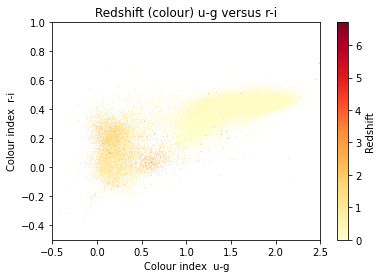

In [33]:
from matplotlib import pyplot as plt
 # Get a colour map
cmap = plt.get_cmap('YlOrRd')

# Define our colour indexes u-g and r-i
u_g = data['u']- data['g']
r_i = data['r']- data['i']

# Make a redshift array
redshift = data['redshift']

# Create the plot with plt.scatter and plt.colorbar
plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)
    
cb = plt.colorbar(plot)
cb.set_label('Redshift')
    
# Define your axis labels and plot title

plt.xlabel('Colour index  u-g')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) u-g versus r-i')

# Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)

plt.show()